Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A04T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG
Creating raw.info structure...


/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['1023', '1072', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 288 events and 1126 original time points ...
1 bad epochs dropped


/tmp/ipykernel_11562/2204910344.py:30: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()
/tmp/ipykernel_11562/2204910344.py:10: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  channel_data = epochs.get_data()[:, channel_index, :]
/tmp/ipykernel_11562/2204910344.py:19: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()
/tmp/ipykernel_11562/2204910344.py:10: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  channel_data = epochs.get_data()[:, channel_index, :]
/tmp/ipykernel_11562/2204910344.py:10: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy expl

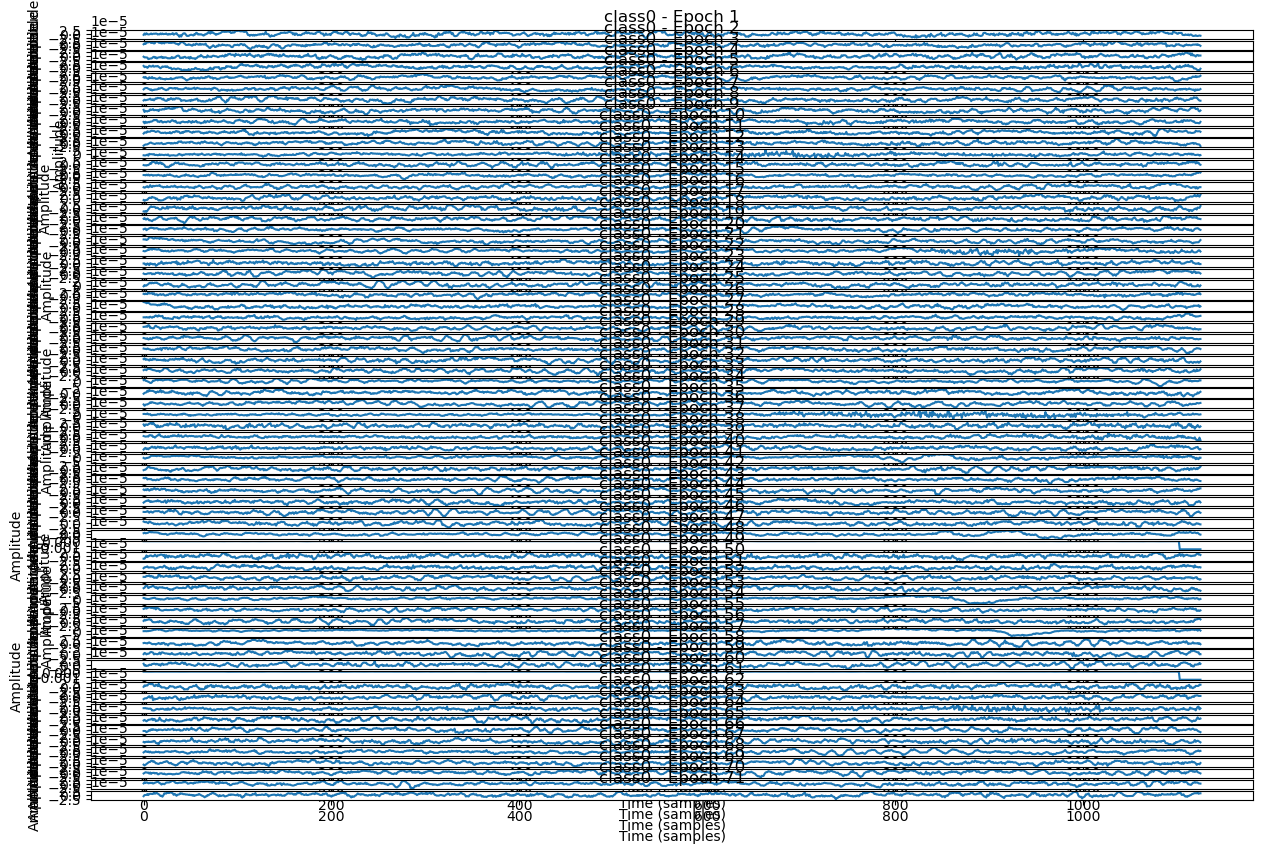

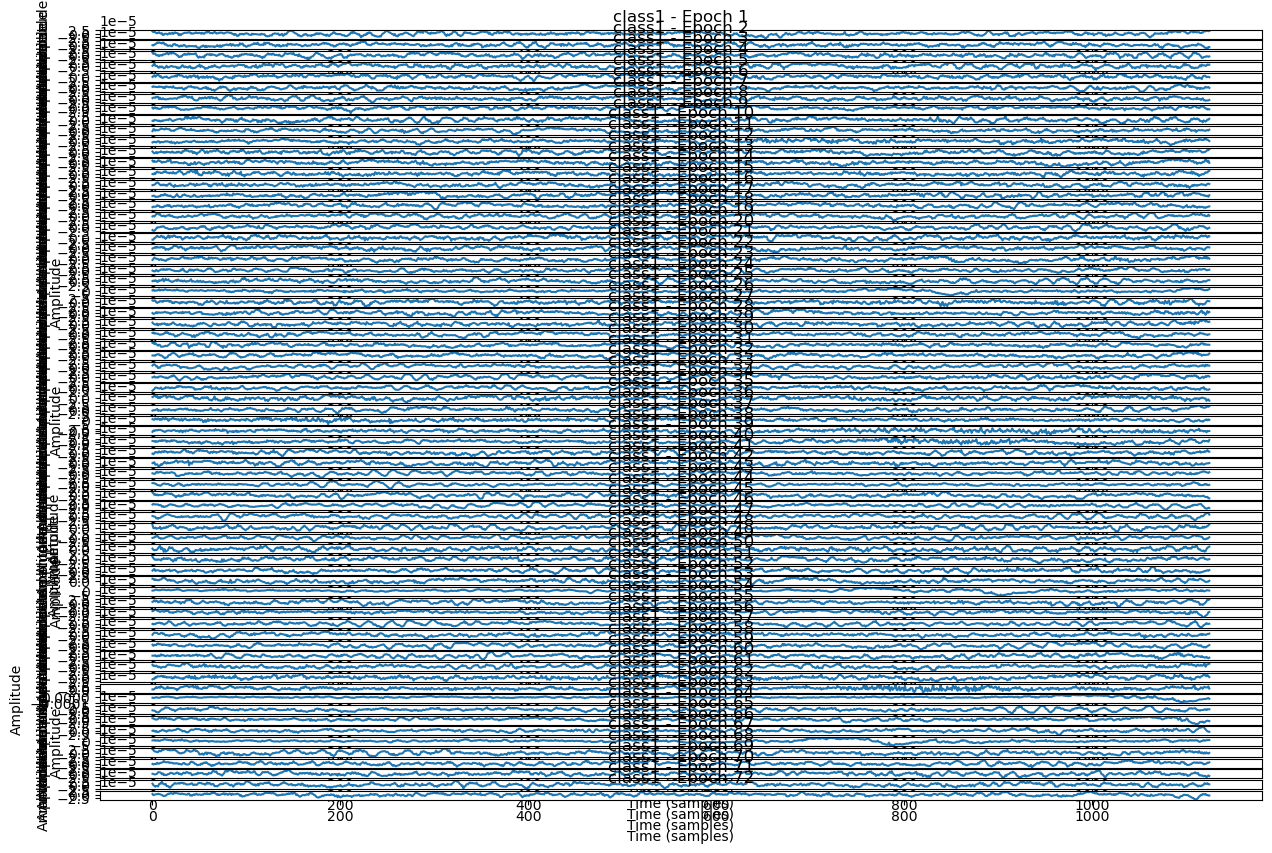

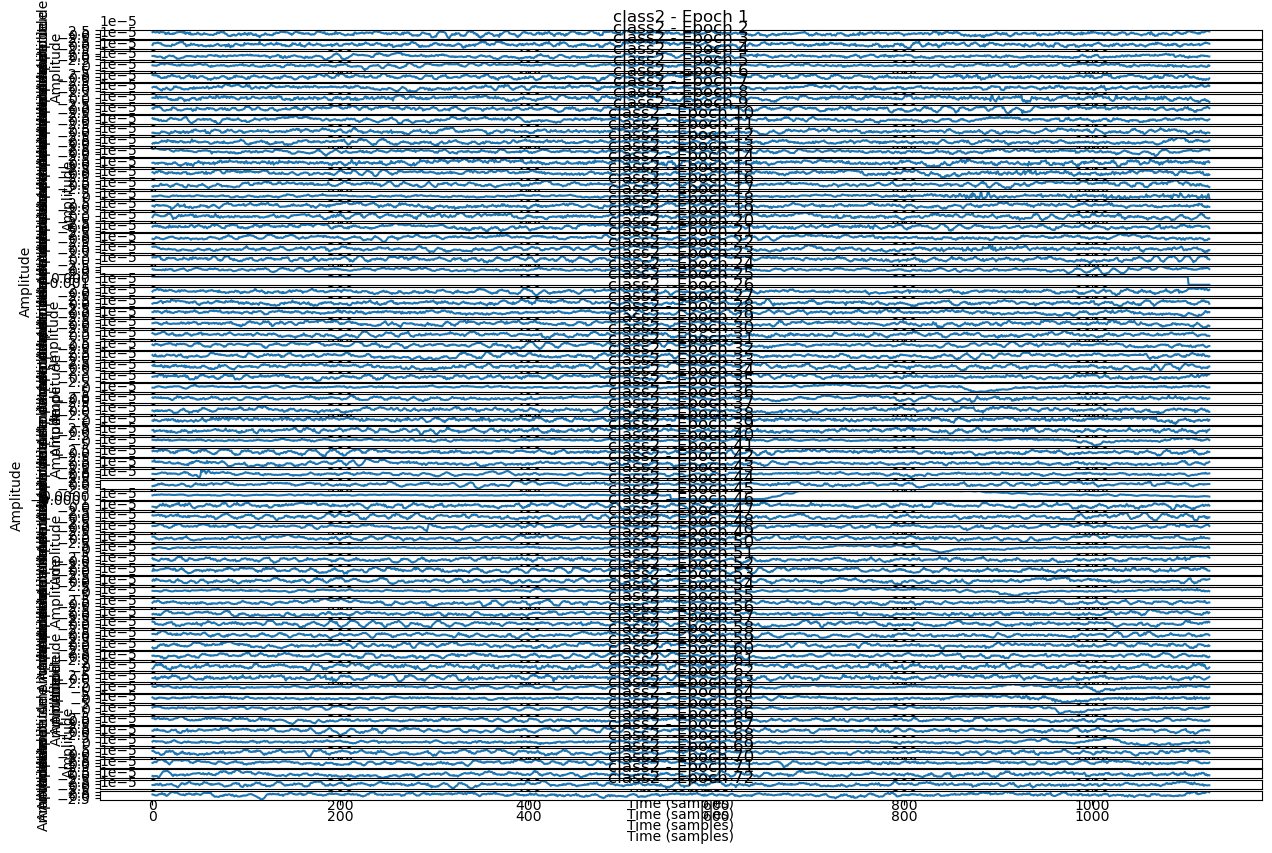

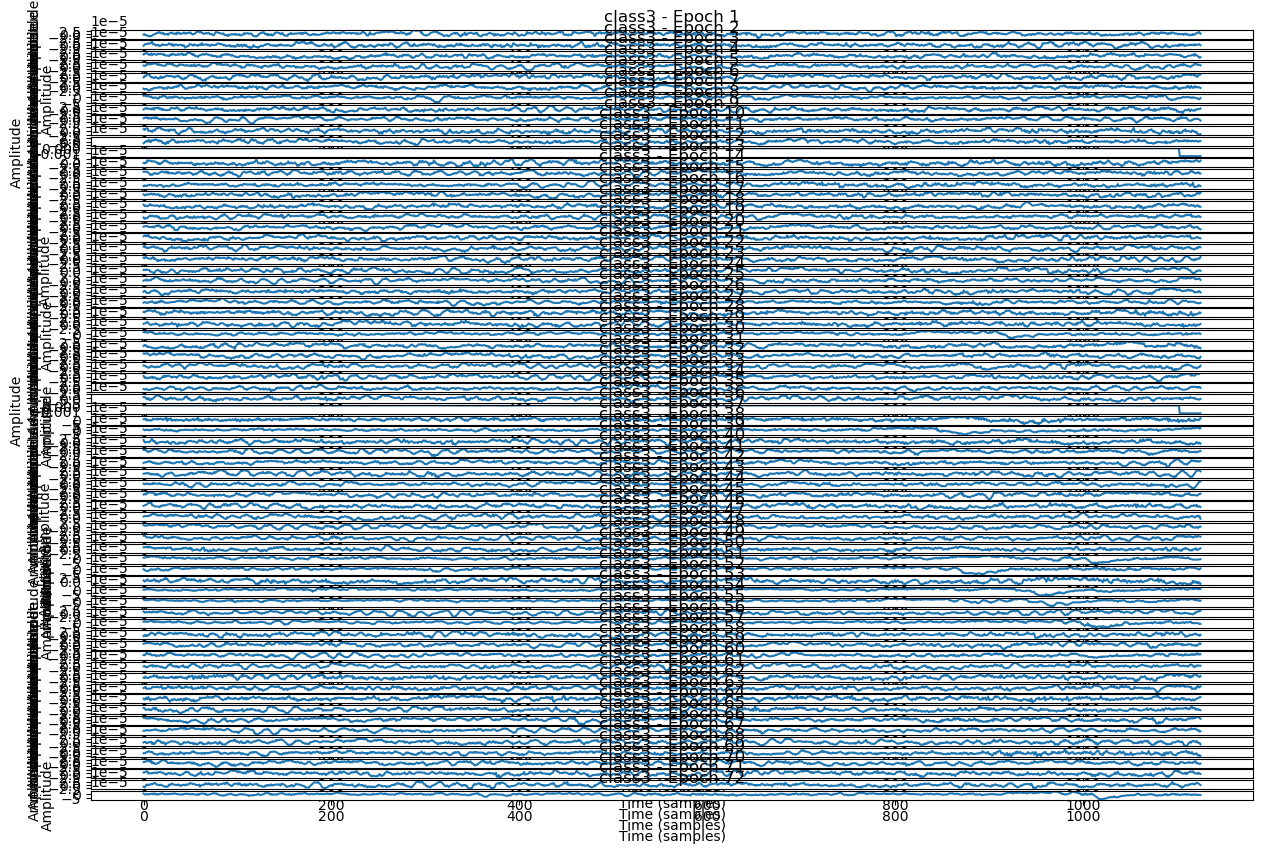

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import mne
from scipy.io import savemat

# Function to plot the EEG signal for each class
def plot_eeg_signal(epochs, class_name, channel_index=21):
    # Extract channel data
    channel_data = epochs.get_data()[:, channel_index, :]
    
    plt.figure(figsize=(15, 10))
    for i, epoch_data in enumerate(channel_data):
        plt.subplot(len(channel_data), 1, i+1)
        plt.plot(epoch_data)
        plt.title(f'{class_name} - Epoch {i+1}')
        plt.xlabel('Time (samples)')
        plt.ylabel('Amplitude')
        plt.tight_layout()

# Load raw data
raw = mne.io.read_raw_gdf('BCICIV_2a_gdf/A04T.gdf', eog=['EOG-left', 'EOG-central', 'EOG-right'])
raw.drop_channels(['EOG-left', 'EOG-central', 'EOG-right'])
events, event_id = mne.events_from_annotations(raw)

# Extract epochs with duration 4.5 seconds
epochs = mne.Epochs(raw, events, event_id={'769': 5, '770': 6, '771': 7, '772': 8}, tmin=1.5, tmax=6, baseline=(1.5, 6), preload=True)

# Extract data and labels
data = epochs.get_data()
labels = epochs.events[:, -1]

# Prepare data for saving in a single .mat file
mat_data = {
    'data': data,
    'labels': labels
}

# Save to a single .mat file
savemat('all_epochs_with_labels.mat', mat_data)

# Plot the EEG signal for each class
plot_eeg_signal(epochs['769'], 'class0')
plot_eeg_signal(epochs['770'], 'class1')
plot_eeg_signal(epochs['771'], 'class2')
plot_eeg_signal(epochs['772'], 'class3')

plt.show()


Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A01T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG
Creating raw.info structure...
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Setting baseline interval to [-0.1, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 288 events and 526 original time points ...


/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


0 bad epochs dropped
combining channels using GFP (eeg channels)
combining channels using GFP (eeg channels)
combining channels using GFP (eeg channels)
combining channels using GFP (eeg channels)


/tmp/ipykernel_11562/2996850647.py:23: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs.get_data().shape


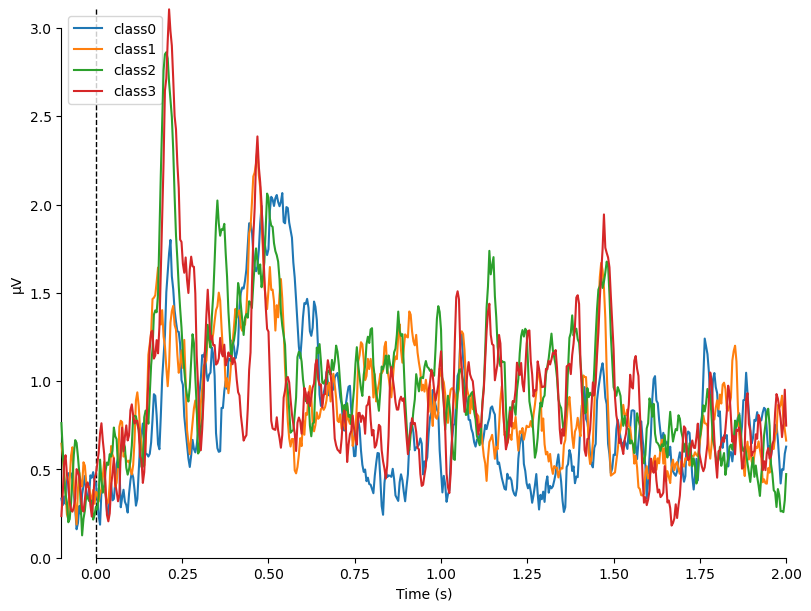

[<Figure size 800x600 with 1 Axes>]

In [7]:
import mne
import os
raw=mne.io.read_raw_gdf('BCICIV_2a_gdf/A01T.gdf',
                         eog=['EOG-left', 'EOG-central', 'EOG-right'])
raw.drop_channels(['EOG-left', 'EOG-central', 'EOG-right'])
events=mne.events_from_annotations(raw)
events[1]

event_dict={
 'reject':1,
 'eye move':2,
 'eye open':3,
 'eye close':4,
 'new run':5,
 'new trial':6,
 'class 1':7,
 'class 2':8,
 'class 3':9,
 'class 4':10,

}
epochs = mne.Epochs(raw, events[0], event_id=[7,8,9,10],tmin= -0.1, tmax=2, preload=True)
epochs.get_data().shape
label=epochs.events[:,-1]
len(label)
evoked_0 = epochs['7'].average()
evoked_1 = epochs['8'].average()
evoked_2 = epochs['9'].average()
evoked_3 = epochs['10'].average()
#left,right,foot,tongue
dicts={'class0':evoked_0,'class1':evoked_1,'class2':evoked_2,'class3':evoked_3}
mne.viz.plot_compare_evokeds(dicts)

In [24]:
import scipy.io

# Load the .mat file
mat_contents = scipy.io.loadmat('all_epochs_with_labels.mat')

# Check the keys (variable names) in the .mat file
print(mat_contents.keys())

# Assuming 'data' and 'labels' are stored in the .mat file under specific variable names
data = mat_contents['data']
labels = mat_contents['labels']

# Print shapes to verify
print("Data shape:", data.shape)
print("Labels shape:", labels.shape)


dict_keys(['__header__', '__version__', '__globals__', 'data', 'labels'])
Data shape: (287, 22, 1126)
Labels shape: (1, 287)


In [25]:
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Assuming labels is loaded as (1, 287) from your MATLAB file
labels = labels.flatten()  # Flatten to (287,)

# Encode labels to numerical values if they are not already numerical
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Convert numerical labels to one-hot encoding
num_classes = 4  # Assuming you have 4 classes
labels_onehot = np.zeros((len(labels_encoded), num_classes))
labels_onehot[np.arange(len(labels_encoded)), labels_encoded] = 1

# Now labels_onehot should have shape (287, 4) where each row is a one-hot encoded vector for each sample
print("Labels shape after one-hot encoding:", labels_onehot.shape)


Labels shape after one-hot encoding: (287, 4)


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import mne
from scipy.io import savemat

# Function to plot the EEG signal for each class
def plot_eeg_signal(epochs, class_name, channel_index=21):
    # Extract channel data
    channel_data = epochs.get_data()[:, channel_index, :]
    
    plt.figure(figsize=(15, 10))
    for i, epoch_data in enumerate(channel_data):
        plt.subplot(len(channel_data), 1, i+1)
        plt.plot(epoch_data)
        plt.title(f'{class_name} - Epoch {i+1}')
        plt.xlabel('Time (samples)')
        plt.ylabel('Amplitude')
        plt.tight_layout()

# Load raw data
raw = mne.io.read_raw_gdf('BCICIV_2a_gdf/A04T.gdf', eog=['EOG-left', 'EOG-central', 'EOG-right'])
raw.drop_channels(['EOG-left', 'EOG-central', 'EOG-right'])
events, event_id = mne.events_from_annotations(raw)

# Extract epochs with duration 4.5 seconds
epochs = mne.Epochs(raw, events, event_id={'769': 5, '770': 6, '771': 7, '772': 8}, tmin=1.5, tmax=6, baseline=(1.5, 6), preload=True)

# Extract data and labels
data = epochs.get_data()
labels = epochs.events[:, -1]

# Prepare data for saving in a single .mat file
mat_data = {
    'data': data,
    'labels': labels
}

# Save all epochs and labels in a single .mat file
savemat('epochs_data.mat', mat_data)
print("Epochs data saved in epochs_data.mat")

# Create directories to save epochs by class
save_dir = 'epochs_by_class'
os.makedirs(save_dir, exist_ok=True)

# Save each epoch into separate files by class
for i, label in enumerate(np.unique(labels)):
    label_dir = os.path.join(save_dir, f'class_{label}')
    os.makedirs(label_dir, exist_ok=True)
    
    for idx in np.where(labels == label)[0]:
        epoch_data = data[idx]
        epoch_fname = os.path.join(label_dir, f'epoch_{idx}.npy')
        np.save(epoch_fname, epoch_data)

print("Epochs saved by class into separate directories.")


Extracting EDF parameters from /home/jovyan/BCICIV_2a_gdf/A04T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG
Creating raw.info structure...


/opt/conda/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['1023', '1072', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 288 events and 1126 original time points ...
1 bad epochs dropped


/tmp/ipykernel_1722801/4280500814.py:30: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()


Epochs data saved in epochs_data.mat
Epochs saved by class into separate directories.


In [31]:
import os
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Directory where epochs are saved by class
data_dir = 'epochs_by_class'

# Function to load data
def load_data(data_dir):
    X = []
    y = []
    for class_label in os.listdir(data_dir):
        class_dir = os.path.join(data_dir, class_label)
        for epoch_file in os.listdir(class_dir):
            epoch_data = np.load(os.path.join(class_dir, epoch_file))
            X.append(epoch_data)
            y.append(int(class_label.split('_')[1]))  # Extract class label from directory name
    X = np.array(X)
    y = np.array(y)
    return X, y

# Load data
X, y = load_data(data_dir)

# Convert labels to categorical (one-hot encoding)
y = to_categorical(y - 5, num_classes=4)  # Assuming labels are 5, 6, 7, 8 and convert to 0-based index

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape data for CNN input (assuming 1D CNN)
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (229, 22, 1126, 1)
Shape of X_test: (58, 22, 1126, 1)
Shape of y_train: (229, 4)
Shape of y_test: (58, 4)


In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=X_train.shape[1:]),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),  # Adding dropout for regularization
    Dense(128, activation='relu'),
    Dropout(0.5),  # Adding dropout for regularization
    Dense(4, activation='softmax')  # Output layer with 4 classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 20, 1124, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 562, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 560, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 280, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 2, 278, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 1, 139, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 17792)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     4,555,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,681,092 (17.86 MB)

 Trainable params: 4,681,092 (17.86 MB)

 Non-trainable params: 0 (0.00 B)

Test Loss: 1.3863
Test Accuracy: 0.2069


In [33]:
# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=500, validation_data=(X_test, y_test))


Epoch 1/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 234ms/step - accuracy: 0.2762 - loss: 1.3883 - val_accuracy: 0.1724 - val_loss: 1.3882
Epoch 2/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 184ms/step - accuracy: 0.2324 - loss: 1.3869 - val_accuracy: 0.1724 - val_loss: 1.3979
Epoch 3/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 192ms/step - accuracy: 0.2811 - loss: 1.3852 - val_accuracy: 0.1724 - val_loss: 1.3941
Epoch 4/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 182ms/step - accuracy: 0.3116 - loss: 1.3828 - val_accuracy: 0.1724 - val_loss: 1.3956
Epoch 5/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 181ms/step - accuracy: 0.3034 - loss: 1.3915 - val_accuracy: 0.1724 - val_loss: 1.3933
Epoch 6/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 179ms/step - accuracy: 0.1988 - loss: 1.3911 - val_accuracy: 0.2241 - val_loss: 1.3913
Epoch 7/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 177ms/step - accuracy: 0.2654 - loss: 1.3854 - val_accuracy: 0.1724 - val_loss: 1.3925
Epoch 8/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 182ms/step - accuracy: 0.2447 - loss: 1.3868 - val_accuracy: 0.1724 - v

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import scipy.io

# Load the data from the .mat file (assuming it's in MATLAB format)
mat = scipy.io.loadmat('all_epochs_with_labels.mat')

# Extract data and labels
data = mat['data']
labels = mat['labels'].flatten()  # Flatten to get a 1D array

# Reshape the data to (287, 22*1126)
data_reshaped = data.reshape(data.shape[0], -1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_reshaped, labels, test_size=0.3, random_state=42)

# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear')

# Train the SVM classifier
svm_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = svm_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy*100:.2f}%')
print('Classification Report:')
print(report)


Accuracy: 21.84%
Classification Report:
              precision    recall  f1-score   support

           5       0.00      0.00      0.00        18
           6       0.00      0.00      0.00        26
           7       0.22      1.00      0.36        19
           8       0.00      0.00      0.00        24

    accuracy                           0.22        87
   macro avg       0.06      0.25      0.09        87
weighted avg       0.05      0.22      0.08        87



/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from qiskit import Aer
from qiskit.utils import QuantumInstance
from qiskit_machine_learning.algorithms import QSVM
from qiskit_machine_learning.kernels import QuantumKernel
from qiskit.circuit.library import ZZFeatureMap
import scipy.io
import torch

# Load the data from the .mat file (assuming it's in MATLAB format)
mat = scipy.io.loadmat('all_epochs_with_labels.mat')

# Extract data and labels
data = mat['data']
labels = mat['labels'].flatten()  # Flatten to get a 1D array

# Reshape the data to (287, 22*1126)
data_reshaped = data.reshape(data.shape[0], -1)

# Standardize the data using GPU
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data_reshaped)

# Move data to GPU
data_standardized = torch.tensor(data_standardized).to('cuda')
labels = torch.tensor(labels).to('cuda')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_standardized.cpu().numpy(), labels.cpu().numpy(), test_size=0.3, random_state=42)

# Define the quantum feature map
feature_map = ZZFeatureMap(feature_dimension=X_train.shape[1], reps=2)

# Define the quantum instance
quantum_instance = QuantumInstance(Aer.get_backend('qasm_simulator'), shots=1024, seed_simulator=42, seed_transpiler=42)

# Define the quantum kernel
quantum_kernel = QuantumKernel(feature_map=feature_map, quantum_instance=quantum_instance)

# Initialize the QSVM
qsvm = QSVM(quantum_kernel, training_input=(X_train, y_train), test_input=(X_test, y_test))

# Train the QSVM
qsvm_result = qsvm.run(quantum_instance)

# Print the results
print(f'Training Accuracy: {qsvm_result["training_accuracy"]*100:.2f}%')
print(f'Test Accuracy: {qsvm_result["test_accuracy"]*100:.2f}%')


ImportError: cannot import name 'Aer' from 'qiskit' (/opt/conda/lib/python3.11/site-packages/qiskit/__init__.py)

In [2]:
!pip install qiskit-aer --timeout=120


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 578.4 kB/s eta 0:00:0000:0100:03
